# Воложанин В.О. ИВТ 1.3 ЛР №2
### Задача классификации. Последовательная нейронная сеть

In [1]:
# Подключение необходимых библиотек
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
%matplotlib inline


In [2]:
# Загрузка данных о винах
data = load_wine()
x_data = data['data']           
y_data = data['target']         

print('Размерность x_data -', x_data.shape)
print('Размерность y_data -', y_data.shape)
print()

# Вывод примера данных
print('Данные по первому вину:', x_data[0])
print('Класс вина:', y_data[0])


Размерность x_data - (178, 13)
Размерность y_data - (178,)

Данные по первому вину: [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
Класс вина: 0


In [3]:
# Перевод в one hot encoding
y_data = utils.to_categorical(y_data, 3)

# Разбиение наборов на общую и тестовую выборки
x_all, x_test, y_all, y_test = train_test_split(x_data,
                                                y_data,
                                                test_size=0.1,
                                                shuffle=True,
                                                random_state=6)

# Разбиение общей выборки на обучающую и проверочную
x_train, x_val, y_train, y_val = train_test_split(x_all,
                                                  y_all,
                                                  test_size=0.1,
                                                  shuffle=True,
                                                  random_state=6)

print(x_train.shape)
print(y_train.shape)
print()
print(x_val.shape)
print(y_val.shape)


(144, 13)
(144, 3)

(16, 13)
(16, 3)


In [4]:
# Функция для создания и компиляции модели
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=13, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [5]:
# Эксперимент 1
model1 = create_model()
history1 = model1.fit(x_train, y_train,
                      epochs=150,
                      batch_size=32,
                      validation_data=(x_val, y_val),
                      verbose=2)
score1 = model1.evaluate(x_test, y_test, verbose=0)
print(f'Эксперимент 1 - Точность на тестовой выборке: {score1[1]*100:.2f}%')


Epoch 1/150


/opt/homebrew/Cellar/jupyterlab/4.1.5/libexec/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 - 1s - 159ms/step - accuracy: 0.4792 - loss: 0.9567 - val_accuracy: 0.2500 - val_loss: 11.9922
Epoch 2/150
5/5 - 0s - 6ms/step - accuracy: 0.5486 - loss: 0.8349 - val_accuracy: 0.2500 - val_loss: 9.9490
Epoch 3/150
5/5 - 0s - 6ms/step - accuracy: 0.6458 - loss: 0.7285 - val_accuracy: 0.2500 - val_loss: 8.8605
Epoch 4/150
5/5 - 0s - 6ms/step - accuracy: 0.6319 - loss: 0.7124 - val_accuracy: 0.2500 - val_loss: 7.9247
Epoch 5/150
5/5 - 0s - 7ms/step - accuracy: 0.6597 - loss: 0.6935 - val_accuracy: 0.2500 - val_loss: 6.9977
Epoch 6/150
5/5 - 0s - 7ms/step - accuracy: 0.6319 - loss: 0.7222 - val_accuracy: 0.2500 - val_loss: 5.8292
Epoch 7/150
5/5 - 0s - 7ms/step - accuracy: 0.6181 - loss: 0.7016 - val_accuracy: 0.2500 - val_loss: 4.8760
Epoch 8/150
5/5 - 0s - 7ms/step - accuracy: 0.6944 - loss: 0.5873 - val_accuracy: 0.2500 - val_loss: 4.1658
Epoch 9/150
5/5 - 0s - 8ms/step - accuracy: 0.7014 - loss: 0.6250 - val_accuracy: 0.2500 - val_loss: 3.5986
Epoch 10/150
5/5 - 0s - 7ms/step - ac

In [6]:
# Эксперимент 2 (изменение оптимизатора)
model2 = create_model()
model2.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
history2 = model2.fit(x_train, y_train,
                      epochs=150,
                      batch_size=32,
                      validation_data=(x_val, y_val),
                      verbose=2)
score2 = model2.evaluate(x_test, y_test, verbose=0)
print(f'Эксперимент 2 - Точность на тестовой выборке: {score2[1]*100:.2f}%')


Epoch 1/150
5/5 - 1s - 124ms/step - accuracy: 0.5903 - loss: 0.8184 - val_accuracy: 0.2500 - val_loss: 11.8284
Epoch 2/150
5/5 - 0s - 6ms/step - accuracy: 0.6181 - loss: 0.7659 - val_accuracy: 0.2500 - val_loss: 10.5243
Epoch 3/150
5/5 - 0s - 6ms/step - accuracy: 0.7292 - loss: 0.6333 - val_accuracy: 0.2500 - val_loss: 9.2622
Epoch 4/150
5/5 - 0s - 6ms/step - accuracy: 0.7222 - loss: 0.6303 - val_accuracy: 0.2500 - val_loss: 7.5983
Epoch 5/150
5/5 - 0s - 6ms/step - accuracy: 0.7153 - loss: 0.6351 - val_accuracy: 0.2500 - val_loss: 6.1889
Epoch 6/150
5/5 - 0s - 6ms/step - accuracy: 0.7431 - loss: 0.5662 - val_accuracy: 0.2500 - val_loss: 5.7039
Epoch 7/150
5/5 - 0s - 6ms/step - accuracy: 0.7639 - loss: 0.5683 - val_accuracy: 0.2500 - val_loss: 4.6028
Epoch 8/150
5/5 - 0s - 6ms/step - accuracy: 0.7778 - loss: 0.5227 - val_accuracy: 0.2500 - val_loss: 3.8640
Epoch 9/150
5/5 - 0s - 6ms/step - accuracy: 0.7778 - loss: 0.5996 - val_accuracy: 0.2500 - val_loss: 3.1630
Epoch 10/150
5/5 - 0s - 

In [7]:
# Эксперимент 3 (изменение количества эпох)
model3 = create_model()
history3 = model3.fit(x_train, y_train,
                      epochs=200,
                      batch_size=32,
                      validation_data=(x_val, y_val),
                      verbose=2)
score3 = model3.evaluate(x_test, y_test, verbose=0)
print(f'Эксперимент 3 - Точность на тестовой выборке: {score3[1]*100:.2f}%')


Epoch 1/200
5/5 - 1s - 156ms/step - accuracy: 0.2569 - loss: 1.8422 - val_accuracy: 0.2500 - val_loss: 1.4809
Epoch 2/200
5/5 - 0s - 7ms/step - accuracy: 0.4306 - loss: 1.2980 - val_accuracy: 0.2500 - val_loss: 4.4761
Epoch 3/200
5/5 - 0s - 7ms/step - accuracy: 0.5347 - loss: 1.0004 - val_accuracy: 0.2500 - val_loss: 5.7809
Epoch 4/200
5/5 - 0s - 8ms/step - accuracy: 0.5903 - loss: 0.8280 - val_accuracy: 0.2500 - val_loss: 6.0873
Epoch 5/200
5/5 - 0s - 9ms/step - accuracy: 0.6042 - loss: 0.7827 - val_accuracy: 0.2500 - val_loss: 5.8044
Epoch 6/200
5/5 - 0s - 8ms/step - accuracy: 0.6528 - loss: 0.7545 - val_accuracy: 0.2500 - val_loss: 5.4562
Epoch 7/200
5/5 - 0s - 7ms/step - accuracy: 0.6389 - loss: 0.7383 - val_accuracy: 0.2500 - val_loss: 4.7751
Epoch 8/200
5/5 - 0s - 8ms/step - accuracy: 0.6806 - loss: 0.6776 - val_accuracy: 0.2500 - val_loss: 4.1947
Epoch 9/200
5/5 - 0s - 8ms/step - accuracy: 0.6458 - loss: 0.6894 - val_accuracy: 0.2500 - val_loss: 3.6369
Epoch 10/200
5/5 - 0s - 8m

In [8]:
# Вывод параметров модели
model3.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,267 (63.55 KB)

 Trainable params: 5,379 (21.01 KB)

 Non-trainable params: 128 (512.00 B)

 Optimizer params: 10,760 (42.04 KB)

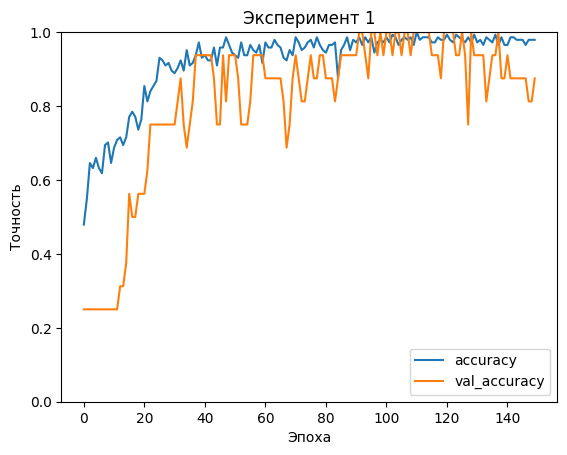

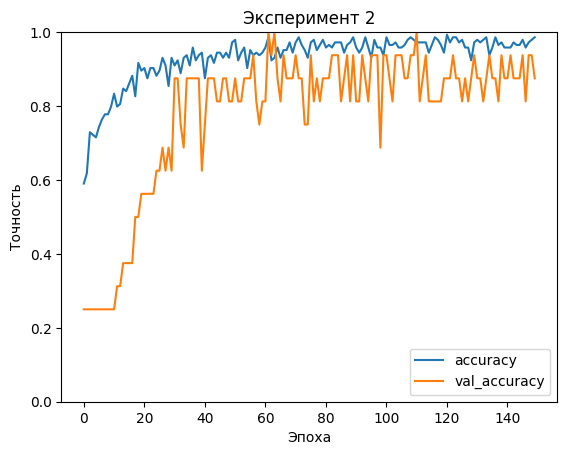

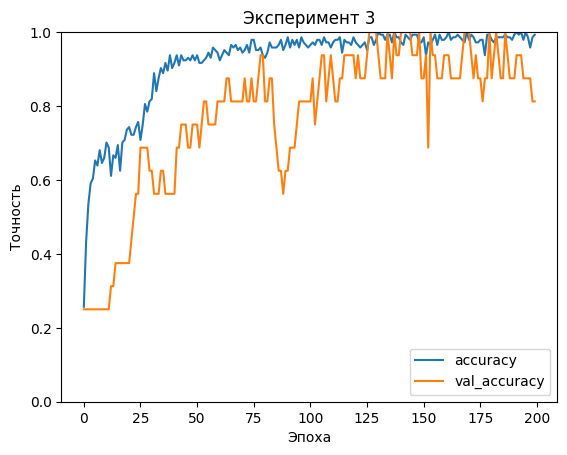

In [9]:
# Отрисовка графиков обучения и валидации
def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Эпоха')
    plt.ylabel('Точность')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.title(title)
    plt.show()

# Отрисовка графиков обучения и валидации для каждого эксперимента
plot_history(history1, 'Эксперимент 1')
plot_history(history2, 'Эксперимент 2')
plot_history(history3, 'Эксперимент 3')
